<div class="alert alert-danger">
<h2> <center>Keceredasan Buatan

### Aga Wira Julyansyah || 09011381722099 || SK 5U

<div class="alert alert-info">
<h2> <center>Introduction to ANN with Digit Recognizer Challenge

    Dalam kasus ini, menunjukkan pendekatan dalam mengimplementasikan Jaringan Syaraf Tiruan (JST) untuk mengklasifikasikan digit ke dalam kategori masing-masing.Telah mencetak Akurasi 96,9%. Data diperoleh dari Kaggle yang telah dipisah menjadi data train dan data test. 


## 1. Preparing Data
    1.  Numpy adalah library Python yang digunakan para data scientist. Berguna untuk  menjalanka operasi matrik atau 
    array.Numpy merupakan salah satu library yang digunakan oleh library lain seperti Scikit-Learn untuk keperluan analisis 
    data (digunakan untuk menginput array).
    2. Pandas memiliki fungsi hampir sama dengan numpy, tapi pada panadas bentuknya lebih seperti matrik (Baris dan Kolom)  
    dalam bentuk tabel
    3. Seaborn  untuk menvisualisai dataset secara statistik
    4. Matplotlib berfungsi untuk  membuat sebuah grafik sebuah dataset yang valid
    5. keras.model berfungsi untuk menginput hidden layer 
    6. keras.layer berfungsi untuk menghitung banyaknya hidden layer yang digunakan pada dataset
    7. Keras.utill berfungsi untuk inport category Y
    8. sklearn.model.selection berfungsi untuk membagi dataset menajdi data train atau data test
    9. sklearn.prepocessing berfungsi untuk merosesan data pada GPU
    10. import OS // prnt(os) berfungsi untuk menunjukan letak datset disimpan


In [138]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline


import os
print(os.listdir("Desktop"))

['20000101_20161231-NO2.csv', 'Anaconda Navigator.lnk', 'auto-mpg.csv', 'beats 3 kelas baru.csv', 'beats 3 kelas Gabung.csv', 'Book1.csv', 'brain_size.csv', 'brain_size.xlsx', 'Cisco Packet Tracer Student.lnk', 'Cisco Packet Tracer.lnk', 'CodeBlocks.lnk', 'creditcard.csv', 'desktop.ini', 'Google Chrome.lnk', 'Internet Download Manager.lnk', 'iris.csv', 'labels 3 kelas baru.csv', 'Microsoft Excel 2010.lnk', 'Microsoft PowerPoint 2010.lnk', 'Microsoft Word 2010.lnk', 'MinGW Installer.lnk', 'test.csv', 'titanic.csv', 'train.csv', 'winequality_edited.csv']


## 2. Import Dataset 
    Pada kasus ini, memiliki 2 file data. Data yang pertama data train.csv dan test.csv. Data tersebut terdiri dari gambar gray scale dari angka yang digambar tangan, dari nol hingga sembilan. Setiap gambar berukuran 28x28 pixcel, dengan total 784 pixcel. Setiap pixcel memiliki nilai pixcel tunggal, yang menunjukkan terang atau gelapnya pixcel tersebut, dengan angka yang lebih tinggi artinya lebih gelap. Nilai piksel ini adalah bilangan bulat antara 0 dan 255, inklusif.




### Import data training sebagai  Numpy array
       Data training memiliki 785 kolom. Kolom pertama, disebut "label" adalah digit yang digambar oleh pengguna. Setiap kolom pixcel dalam data training memiliki nama seperti pixcel, di mana x adalah bilangan bulat antara 0 dan 783, inklusif yang mengikuti lokasi pixcel.




In [139]:
df = pd.read_csv("Desktop/train.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Shape (jumlah dari kolom dan baris data) 
    Baris berjumlah 4200
    Kolom berjumlah 785

In [140]:
df.shape

(42000, 785)

### Dtypes ( Bentuk Data)
    pada dataset, data berbentuk integer dimana data berisi angka (bilangan) bulat

In [141]:
df.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

### Describe
    Menjelasan isi dari dataset tersebut:
    1. Count
    2. Mean
    3. Min
    4. Max

In [142]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


### Pembagi data
    Dibawah ini merupakan cara untuk membagi dataset menjadi dua yaitu data train dan data test.

In [143]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

### Grafik Distrubusi Data  

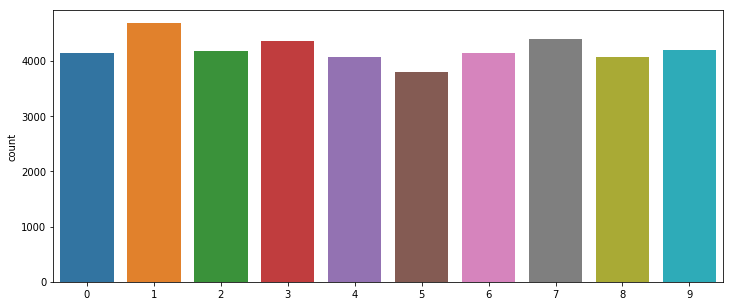

In [144]:
fig, (ax1) = plt.subplots(nrows=1, figsize=(12,5))
sns.countplot(y)

## 3. Cek Nilai Null (NaN)
    Cek nilai Nan berfungsi agar data tersebut tidak memiliki data kosong disetiap baris dan kolomnya. false berarti data tidak ada yang kosong, apabilai true berarti data ada yang kosong sehingga data haru diperbaiki
    

In [145]:
np.unique(np.isnan(X))[0]

False

In [146]:
np.unique(np.isnan(y))[0]

False

## 4. Spliting Data
   ### Memisahkan Dataset menjadi data Train dan data test. Dataset train 90% dari keseluruhan, sedangkan test diberi 10%.

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

### Dapat dilihat dari 42000 data, train diberi 37800 (90%) dan test diberi 4200 (0%) dari keseluruhan data

In [148]:
print("training data : {}".format(len(y_train)))
print("testing data : {}".format(len(y_test)))

training data : 37800
testing data : 4200


## 5. Scaling Data
    Pada step ini, mentransformasikan dataset sedemikian rupa sehingga dstrubusinya menghasilkan nilai rata- rata 0 dan standar deviasi 1. Setiap data akan memproleh nilai dari setiap nilai rata-rata sampel dikurangi dan kemudian dibagi dengan standar deviasi seluruh dataset. 

In [149]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [150]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

## 6. Modelling
    Model berfungsi untuk membuat hidden layer dan memproses dataset dengan menggunakan fungsi sequential . Layer menggunakan tipe dense untuk training denggan menghubungkan setiap Neurall Network.

In [151]:
model = Sequential()

In [152]:
model.add(Dense(units = 784, activation = 'relu', input_dim = 784))

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(0.05))

In [153]:
model.add(Dense(units = 10, activation = 'softmax'))

In [154]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## 7.Fit Model
    Fit model adalah langkah untuk memproleh Accuracy dan loss. Fungsi aktivasi yang digunakan adalah relu, untuk output digunakan sigmoid. Optimizer adam dengan fungsi loss binary crossentropy. Epoch yang digunakan sdengan pengulangan sebanyak 1 kali
    1. X_train merupakan bagian variabel bebas dari data yang dipasangkan dengan model.
    2. Y_train adalah output dari data yang dimodelkan
    3. batch_size kegiatan yang menghitung Seberapa sering melakukan back-propogate nilai kesalahan sehingga bobot masing-masing simpul dapat disesuaikan.
    4. nb_epochs adalah  Frekuensi kami ingin menjalankan seluruh data pengujian lagi untuk menyesuaikan bobotnya. Ini seperti bahan bakar dari algoritma.

In [155]:
history = model.fit(X_train, y_train, 
                         validation_data = (X_test, y_test), 
                         batch_size = 38, 
                         epochs = 50)

Train on 37800 samples, validate on 4200 samples
Epoch 1/50
37800/37800 [==============================] - 30s 797us/step - loss: 1.1796 - accuracy: 0.6060 - val_loss: 0.4572 - val_accuracy: 0.8883
Epoch 2/50
37800/37800 [==============================] - 23s 596us/step - loss: 0.3826 - accuracy: 0.8920 - val_loss: 0.2624 - val_accuracy: 0.9236
Epoch 3/50
37800/37800 [==============================] - 22s 572us/step - loss: 0.2508 - accuracy: 0.9307 - val_loss: 0.2161 - val_accuracy: 0.9393
Epoch 4/50
37800/37800 [==============================] - 22s 575us/step - loss: 0.1872 - accuracy: 0.9485 - val_loss: 0.2122 - val_accuracy: 0.9412
Epoch 5/50
37800/37800 [==============================] - 21s 550us/step - loss: 0.1482 - accuracy: 0.9598 - val_loss: 0.1771 - val_accuracy: 0.9512
Epoch 6/50
37800/37800 [==============================] - 21s 554us/step - loss: 0.1187 - accuracy: 0.9679 - val_loss: 0.1687 - val_accuracy: 0.9564
Epoch 7/50
37800/37800 [==============================] -

## 8. Performance Evaluation
## Plotting Model Akurasi dan Loss 

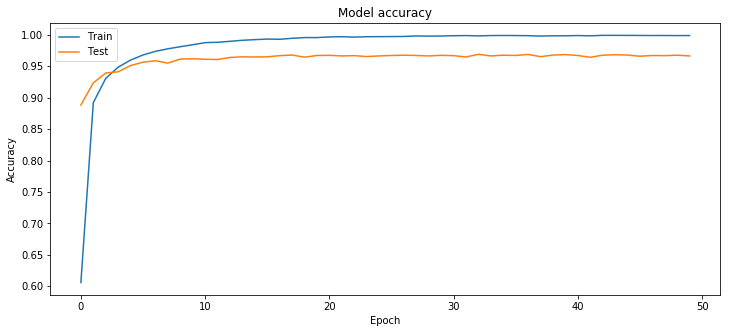

In [156]:
fig, (ax1) = plt.subplots(nrows=1, figsize=(12,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

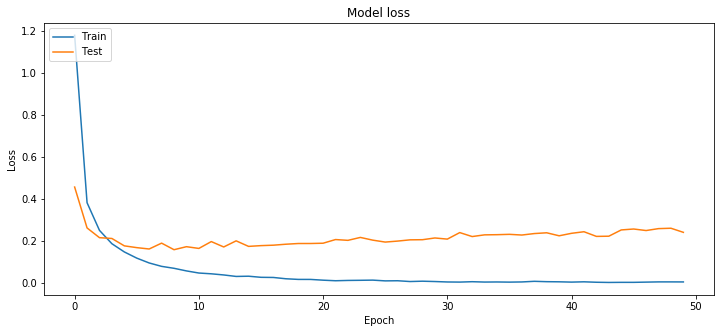

In [157]:
fig, (ax1) = plt.subplots(nrows=1, figsize=(12,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 9. Menghitung Akurasi
        Setelah data di training, lalu data dapat dievaluasi melalui proses evaluasi model dan hasil dari akurasi akan dapat ditampilkan. Hasil AKurasinya sebesar 96.9%

In [158]:
model_acc = model.evaluate(X_test, y_test)
print(" Model Accuracy is : {0:.1f}%".format(model_acc[1]*100))

4200/4200 [==============================] - 3s 651us/step
 Model Accuracy is : 96.6%


## 10.Confusion Matrix
    Confusion matrix merupakan salah satu metode yang dapat digunakan untuk mengukur kinerja suatu metode klasifikasi. Confusion matrik yang dipakai disini adalah multiclass. pada bentuk klasifikasi multi-class, data masukan diklasifikasikan menjadi beberapa kelas. 
#### pada kasus ini diperoleh confusion matrik sebesar 10x10, dimana diperoleh dari data yang berjumlah 10 dari 0 sampai 9.

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [160]:
y_pred=model.predict(X_test)
yl=np.argmax(y_pred, axis=1)

In [162]:
from sklearn.metrics import confusion_matrix, classification_report

In [163]:
cm=confusion_matrix(y_test, yl)

In [164]:
cm

array([[394,   0,   1,   4,   1,   2,   2,   0,   3,   1],
       [  0, 452,  10,   0,   0,   0,   1,   5,   3,   0],
       [  0,   1, 392,   6,   5,   0,   1,  12,   2,   1],
       [  1,   2,   2, 491,   0,   3,   0,   3,   3,   1],
       [  0,   1,   0,   1, 353,   0,   7,   2,   2,  31],
       [  1,   0,   2,  26,   1, 268,   9,   0,  29,   3],
       [  5,   1,   3,   3,   2,   0, 383,   0,   5,   0],
       [  1,   1,   7,   4,   3,   1,   0, 402,   0,  19],
       [  0,   0,   4,  13,   0,   0,   2,   1, 381,   2],
       [  1,   0,   1,   6,   0,   0,   0,   5,   7, 396]], dtype=int64)

## 11. Import the Test Data

In [165]:
df = pd.read_csv("Desktop/test.csv")
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
test = df.iloc[:,:].values

## 12. Make Predictions for ‘ test ‘ data

In [167]:
test_pred = model.predict(test)
results = test_pred.argmax(axis=1)

## 13. Visualize some test results

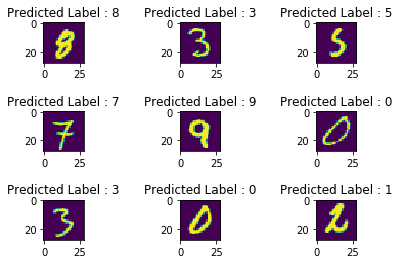

In [168]:
for i in range(1,10):
    index = np.random.randint(1,28001)
    plt.subplot(3,3,i)
    plt.imshow(test[index].reshape(28,28))
    plt.title("Predicted Label : {}".format(results[index]))
plt.subplots_adjust(hspace = 1.2, wspace = 1.2)
plt.show()